In [1]:
pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.8/481.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 kB 8.7 MB/s eta 0:00:00
 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load data

In [4]:
data=pd.read_csv("mobile.csv")

In [5]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
data.shape

(2000, 21)

In [8]:
from pycaret.classification import *


In [10]:
setup(data=data,target=data.columns[-1])

,Description,Value
0,Session id,4815
1,Target,price_range
2,Target type,Multiclass
3,Original data shape,"(2000, 21)"
4,Transformed data shape,"(2000, 21)"
5,Transformed train set shape,"(1400, 21)"
6,Transformed test set shape,"(600, 21)"
7,Numeric features,20
8,Preprocess,True
9,Imputation type,simple


In [11]:
best_model=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9493,0.9947,0.9493,0.9519,0.9496,0.9324,0.9331,0.0720
qda,Quadratic Discriminant Analysis,0.9200,0.9922,0.9200,0.9225,0.9197,0.8933,0.8944,0.1130
knn,K Neighbors Classifier,0.9157,0.9880,0.9157,0.9182,0.9156,0.8876,0.8885,0.1040
xgboost,Extreme Gradient Boosting,0.9136,0.9877,0.9136,0.9167,0.9133,0.8848,0.8859,0.7970
lightgbm,Light Gradient Boosting Machine,0.9079,0.9881,0.9079,0.9111,0.9077,0.8771,0.8783,0.9530
gbc,Gradient Boosting Classifier,0.8964,0.9848,0.8964,0.8982,0.8960,0.8619,0.8627,2.1610
rf,Random Forest Classifier,0.8721,0.9773,0.8721,0.8755,0.8717,0.8295,0.8309,0.6360
et,Extra Trees Classifier,0.8514,0.9679,0.8514,0.8545,0.8510,0.8019,0.8032,0.7960
dt,Decision Tree Classifier,0.8307,0.8871,0.8307,0.8335,0.8305,0.7743,0.7753,0.0670
nb,Naive Bayes,0.8121,0.9534,0.8121,0.8166,0.8123,0.7495,0.7508,0.0650


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

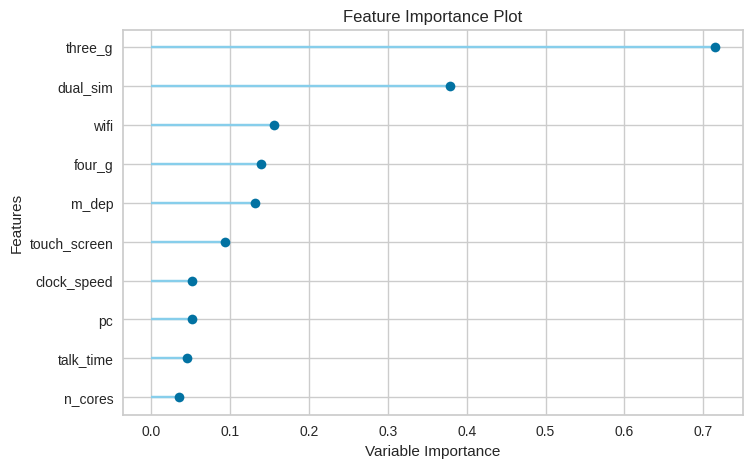

In [12]:
plot_model(estimator=best_model,plot='feature')

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

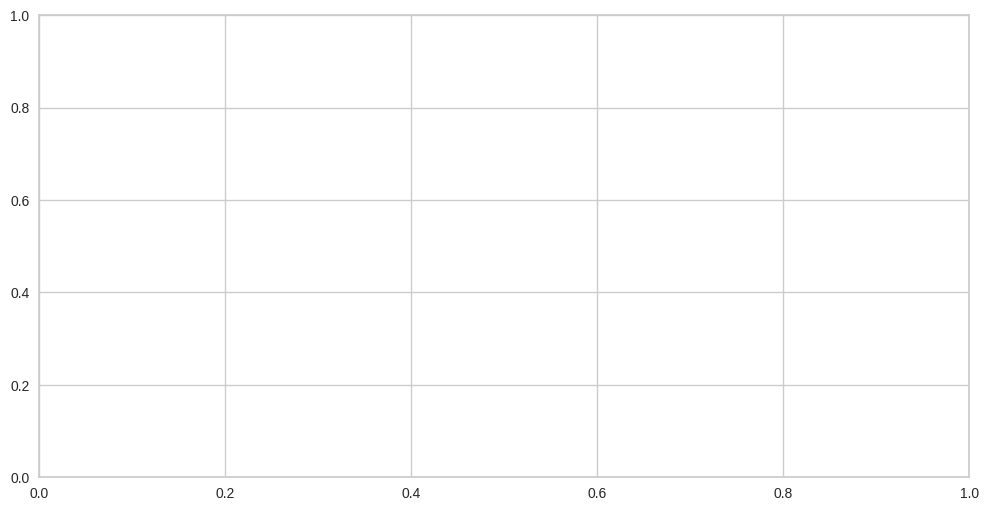

In [13]:
evaluate_model(best_model)

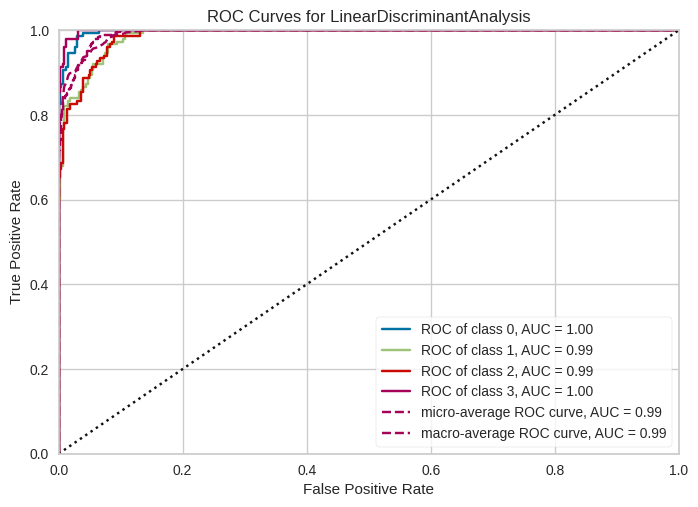

In [14]:
plot_model(best_model)

In [16]:
model=create_model('lda',cross_validation=True,fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9714,0.9977,0.9714,0.9722,0.9714,0.9619,0.9622
1,0.9071,0.9886,0.9071,0.9155,0.9087,0.8762,0.8778
2,0.9500,0.9963,0.9500,0.9529,0.9506,0.9333,0.9339
3,0.9357,0.9939,0.9357,0.9364,0.9354,0.9143,0.9147
4,0.9286,0.9905,0.9286,0.9357,0.9289,0.9048,0.9071
5,0.9714,0.9985,0.9714,0.9726,0.9715,0.9619,0.9622
6,0.9429,0.9935,0.9429,0.9461,0.9434,0.9238,0.9246
7,0.9571,0.9979,0.9571,0.9575,0.9571,0.9429,0.9430
8,0.9857,0.9978,0.9857,0.9865,0.9858,0.9810,0.9812


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [17]:
tuned_model=tune_model(model,optimize='AUC',fold=10,n_iter=20)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9643,0.9985,0.9643,0.9661,0.9645,0.9524,0.9528
1,0.9357,0.9915,0.9357,0.9407,0.9366,0.9143,0.9153
2,0.9643,0.9971,0.9643,0.9654,0.9646,0.9524,0.9526
3,0.9500,0.9954,0.9500,0.9509,0.9498,0.9333,0.9338
4,0.9143,0.9893,0.9143,0.9199,0.9147,0.8857,0.8874
5,0.9714,0.9997,0.9714,0.9726,0.9715,0.9619,0.9622
6,0.9429,0.9949,0.9429,0.9455,0.9432,0.9238,0.9244
7,0.9429,0.9976,0.9429,0.9440,0.9430,0.9238,0.9241
8,0.9857,0.9984,0.9857,0.9865,0.9857,0.9810,0.9812


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 20 candidates, totalling 200 fits


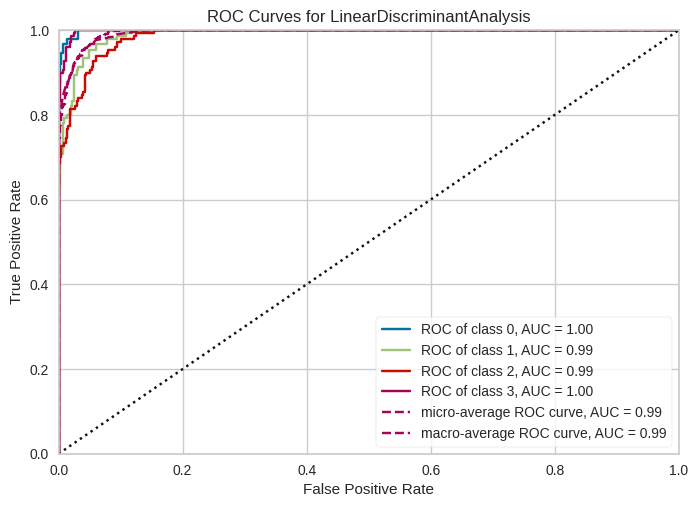

In [19]:
plot_model(tuned_model)



In [20]:
save_model(tuned_model, model_name = 'lda_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/tmp/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['battery_power', 'blue',
                                              'clock_speed', 'dual_sim', 'fc',
                                              'four_g', 'int_memory', 'm_dep',
                                              'mobile_wt', 'n_cores', 'pc',
                                              'px_height', 'px_width', 'ram',
                                              'sc_h', 'sc_w', 'talk_time',
                                              'three_g', 'touch_screen',
                                              'wifi'],
                                     transformer=SimpleImputer(add_indi...
                  TransformerWrapper(exclude=None, include=[],
                                     transformer=SimpleImputer(add_indicator=False,
                                                   